In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# get UTKFace.zip  
import os 
os.chdir("/content/drive/MyDrive/Colab Notebooks/大伯 - ML_Code")
!pwd
!ls -l

/content/drive/MyDrive/Colab Notebooks/大伯 - ML_Code
total 4504934
-rw------- 1 root root    8191848 Jul  4 18:13 best_cifar10_weights.h5
-rw------- 1 root root   90251248 Aug 15 16:49 best_fmnist_weights.h5
-r-------- 1 root root 4405025375 Jul 25  2018 CASIA-WebFace.zip
drwx------ 2 root root       4096 Aug 15 11:16 cifar-10-batches-py
-rw------- 1 root root    1104526 Aug  9 23:20 cifar10_classifier.ipynb
-rw------- 1 root root       3091 Jun 30 00:30 cifar10_cnn_orig.py
-rw------- 1 root root      14757 Aug  6 22:33 cifar10_convert_img.ipynb
-rw------- 1 root root     180733 Aug 15 17:06 fMnist_classifier.ipynb
drwx------ 2 root root       4096 Aug 15 11:16 hyper_dir
drwx------ 2 root root       4096 Aug 15 11:16 model_weights
-rw------- 1 root root     222380 Jul  4 19:57 ResNet9_128_batch_acc_0.9332_fig.png
-rw------- 1 root root     220955 Jul  2 07:46 ResNet9_128_batch_acc_0.9392_fig.png
-rw------- 1 root root     135963 Aug 10 18:37 test_model.ipynb
-rw------- 1 root root      

In [ ]:
import tarfile

if os.path.exists("UTKFace"):
    print("UTKFace folder already exists.")
else:
    tar = tarfile.open("UTKFace.tar.gz")
    tar.extractall()
    tar.close()
    
    print("UTKFace.tar.gz has been unzipped.")

UTKFace folder already exists.


In [ ]:
# Method 2:  use pandas (quick)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%time utk_face = pd.Series(os.listdir("UTKFace"))

img = plt.imread(os.getcwd()+"/UTKFace/"+utk_face[0], "jpg")
print(f"\nUTKFace Total Imgs: {utk_face.count()}, Shape: {img.shape}")
print(f"UTKFace have: {utk_face.isnull().sum()} NaN values.\n")


# Pattern divide: Gender, Race 
m_pattern = r"^[0-1]?\d?\d+_0_[0-4]+_"   # have space: , pattern (serious): r"^[0-1]?\d?\d+_0_[0-4]+_\d*\s?\.jpg\.chip\.jpg$"
fm_pattern = r"^[0-1]?\d?\d+_1_[0-4]+_"
race = ["White", "Black", "Asian", "Indian", "Others"]


# All Male:

m_matches = utk_face.str.match(m_pattern)
print(f"All Male total imgs: {m_matches.sum()}")
print(f"Top 5 data:\n{utk_face[m_matches].head()}\n")


## Male faces divided into race --> White, Black, Asian, Indian, and Others(like Hispanic, Latino, Middle Eastern)
mr_pattern = [m_pattern[:16]+str(i)+m_pattern[-2:] for i in range(5)]
m_race_dict = { i:j for i, j in zip(race, mr_pattern)}

def male_race(face, r, r_d):
    matches = []
    for i, j in enumerate(r):
        match = face.str.match(r_d[j])
        # print(f"Male Race {i}({j}) Top 5 data:\n{face[match].head()}\n")
        print(f"Male Race {i}({j}): {match.sum()}")
        matches.append(match.sum())

    return matches

m_race_match = male_race(utk_face, race, m_race_dict)
print("\n----------------------------------------------")


# All Female:

fm_matches = utk_face.str.match(fm_pattern)
print(f"All Female total imgs: {fm_matches.sum()}")
print(f"Top 5 data:\n{utk_face[fm_matches].head()}\n")


## Female faces divided into race --> White, Black, Asian, Indian, and Others(like Hispanic, Latino, Middle Eastern)
fr_pattern = [fm_pattern[:16]+str(i)+fm_pattern[-2:] for i in range(5)]
fm_race_dict = { i:j for i, j in zip(race, fr_pattern)}

def female_race(face, r, r_d):
    matches = []
    for i, j in enumerate(r):
        match = face.str.match(r_d[j])
        # print(f"Female Race {i}({j}) Top 5 data:\n{face[match].head()}\n")
        print(f"Female Race {i}({j}): {match.sum()}")
        matches.append(match.sum())

    return matches

fm_race_match = female_race(utk_face, race, fm_race_dict)
print("\n----------------------------------------------")


# Other: (missing race)
other = utk_face[utk_face.str.match(r"^[0-1]?\d?\d+_[0-1]_[0-4]+_") == False]
print(f"Other img(missing race): {other.count()}\n\n{other}\n")
print("----------------------------------------------")


# UTKface divided into Race:
# Race pattern
pattern = r"^[0-1]?\d?\d+_[0-1]_[0-4]+_"
race_pattern = [pattern[:20]+str(i)+pattern[-1:] for i in range(5)]
race_dict = { i:j for i, j in zip(race, race_pattern)}


def race_match(face, r, r_d):
    matches = []
    pattern_match = []
    for i, j in enumerate(r):
        match = face.str.match(r_d[j])
        # print(f"UTKFace Race {i}({j}) Top 5 data:\n{face[match].head()}\n")
        print(f"UTKFace Race {i}({j}): {match.sum()}")
        pattern_match.append(match)
        matches.append(match.sum())

    return matches, pattern_match

print("UTKface divided into Race (include male & female):\n")
r_matches, r_pattern_match = race_match(utk_face, race, race_dict)
print(f"\nUTKface Race Total imgs: {np.array(r_matches).cumsum()[-1]}")
print("----------------------------------------------")


# Pattern divided into Age (1-9, 10-19, ...,100-109, 110-116) --> not have Other(missing race)
age_pattern = r"^[0-1]?\d?\d+_[0-1]_[0-4]+_"

range_1 = "^[1-9]?" + age_pattern[13:]           # range_2 = "^([1]\d)+" + age_pattern[13:], range_3 = "^([2]\d)+" + age_pattern[13:]
range_10 = "^([1][0]\d)+" + age_pattern[13:]
range_11 = "^([1][1][0-6])+" + age_pattern[13:]

range_pattern = [f"^([{i}]\d)+"+age_pattern[13:] for i in range(1, 10)]
range_pattern.insert(0, range_1)
range_pattern.append(range_10)
range_pattern.append(range_11)

age_range = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-109", "110-116"]
age_dict = { i:j for i, j in zip(age_range, range_pattern)}

def age_sum(face, age):
    matches = []
    pattern_match = []
    for i in range(len(age)):
        match = face.str.match(age_dict[age[i]])
        pattern_match.append(match)
        matches.append(match.sum())

    return matches, pattern_match

age_matches, age_p_match = age_sum(utk_face, age_range)
print(f"Total Age rank sum: {np.array(age_matches).cumsum()[-1]} --> not have Other: {other.count()}\n")

for i in range(len(age_matches)):
    # rank = utk_face.str.match(age_dict[age_range[i]])
    # print(f"Range {i+1}({age_range[i]} Top 5 data:\n{utk_face[rank].head()}\n")
    print(f"Range {i+1}({age_range[i]} old): {age_matches[i]}")


CPU times: user 12.6 ms, sys: 10.1 ms, total: 22.8 ms
Wall time: 311 ms

UTKFace Total Imgs: 23708, Shape: (200, 200, 3)
UTKFace have: 0 NaN values.

All Male total imgs: 12391
Top 5 data:
0    56_0_2_20170119180737540.jpg.chip.jpg
1    56_0_3_20170119180848388.jpg.chip.jpg
2    56_0_3_20170119183551541.jpg.chip.jpg
3    56_0_0_20170119181226587.jpg.chip.jpg
4    56_0_3_20170119180916188.jpg.chip.jpg
dtype: object

Male Race 0(White): 5477
Male Race 1(Black): 2318
Male Race 2(Asian): 1575
Male Race 3(Indian): 2261
Male Race 4(Others): 760

----------------------------------------------
All Female total imgs: 11314
Top 5 data:
8     56_1_3_20170119181445803.jpg.chip.jpg
9     56_1_0_20170119202536518.jpg.chip.jpg
14    56_1_3_20170119211416888.jpg.chip.jpg
16    56_1_3_20170119183420176.jpg.chip.jpg
20    56_1_3_20170119192943673.jpg.chip.jpg
dtype: object

Female Race 0(White): 4601
Female Race 1(Black): 2208
Female Race 2(Asian): 1859
Female Race 3(Indian): 1714
Female Race 4(Others):

In [ ]:
# Age DataFrame

df_age = pd.DataFrame({"num of people": age_matches}, index = [i + " old" for i in age_range])
df_age.index.name = "Years Old"
df_age.columns.name = "Male&Female"
print(f"UTKFace divided into age: (not have Other: {other.count()})\n\n{df_age}\n")
print(f"Total: {np.array(age_matches).cumsum()[-1]}")
print("---------------------------------------")


# Race DataFrame

df_race = pd.DataFrame({"num of people": r_matches}, index = race)
df_race.index.name = "Race"
df_race.columns.name = "UTKFace"
print(f"UTKFace divided into Race:\n\n{df_race}\n")
print(f"Total: {np.array(r_matches).cumsum()[-1]}")
print("---------------------------------------")


# Male race DataFrame

df_m_race = pd.DataFrame({"num of people(male)": m_race_match}, index = race)
df_m_race.index.name = "Race"
df_m_race.columns.name = "Male"
print(f"UTKFace divided into Male Race:\n\n{df_m_race}\n")
print(f"Total: {np.array(m_matches).cumsum()[-1]}")
print("---------------------------------------")


# Female race DataFrame

df_fm_race = pd.DataFrame({"num of people(female)": fm_race_match}, index = race)
df_fm_race.index.name = "Race"
df_fm_race.columns.name = "Female"
print(f"UTKFace divided into Female Race:\n\n{df_fm_race}\n")
print(f"Total: {np.array(fm_matches).cumsum()[-1]}")
print("---------------------------------------")


# merge(Male & Female)

df_merge = pd.merge(df_m_race, df_fm_race, on = "Race")
df_merge.index.name = "Male & Female"
print(f'''Male & Female Race merge:\n\n{df_merge}\n''')
print(f"Total: {np.array(m_matches).cumsum()[-1] + np.array(fm_matches).cumsum()[-1]}")

UTKFace divided into age: (not have Other: 3)

Male&Female  num of people
Years Old                 
0-9 old               3062
10-19 old             1531
20-29 old             7344
30-39 old             4536
40-49 old             2245
50-59 old             2299
60-69 old             1316
70-79 old              699
80-89 old              504
90-99 old              137
100-109 old             19
110-116 old             13

Total: 23705
---------------------------------------
UTKFace divided into Race:

UTKFace  num of people
Race                  
White            10078
Black             4526
Asian             3434
Indian            3975
Others            1692

Total: 23705
---------------------------------------
UTKFace divided into Male Race:

Male    num of people(male)
Race                       
White                  5477
Black                  2318
Asian                  1575
Indian                 2261
Others                  760

Total: 12391
-----------------------------------

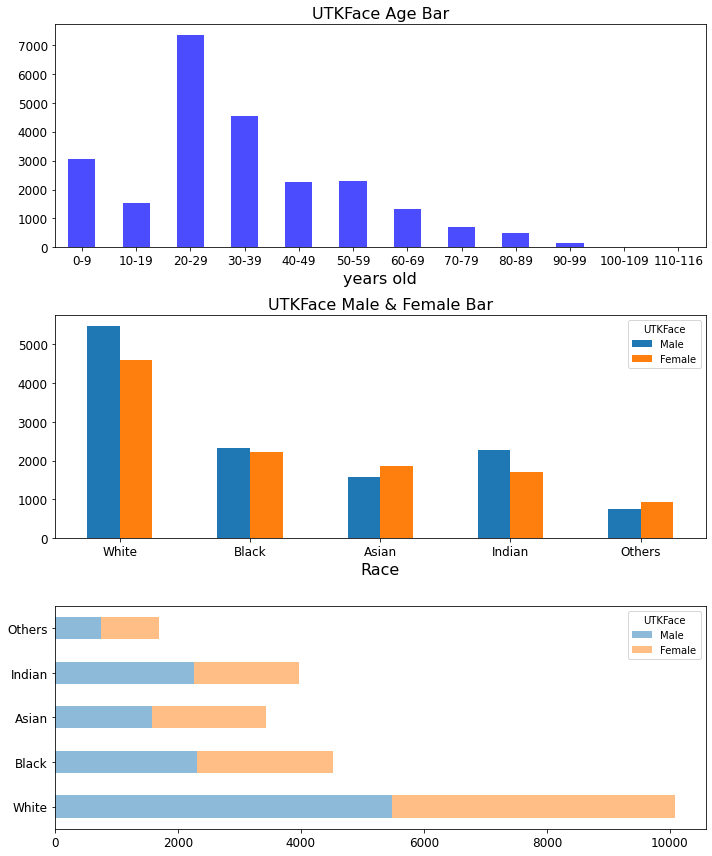

In [ ]:
# Age bar, Male & Female Race bar

plt.figure(figsize = (10, 12), tight_layout = True)
ax1 = plt.subplot(3, 1, 1)

age_bar = pd.Series(age_matches, index = age_range)
plt.title("UTKFace Age Bar", fontsize = 16)
plt.xlabel("years old", fontsize = 16)
age_bar.plot.bar(ax=ax1, color='b', alpha=0.7, fontsize = 12)
plt.xticks(rotation=0)

ax2 = plt.subplot(3, 1, 2)

race_data = {"Male": m_race_match, "Female": fm_race_match}
race_bar = pd.DataFrame(race_data, index = race, columns = pd.Index(["Male", "Female"], name = "UTKFace"))
race_bar.plot.bar(ax=ax2, fontsize = 12)
plt.title("UTKFace Male & Female Bar", fontsize = 16)
plt.xlabel("Race", fontsize = 16)
plt.xticks(rotation=0)

ax3 = plt.subplot(3, 1, 3)

race_bar.plot.barh(ax=ax3, stacked = True, alpha = 0.5, fontsize = 12)

Male: random 6 imgs, Female: random 6 imgs


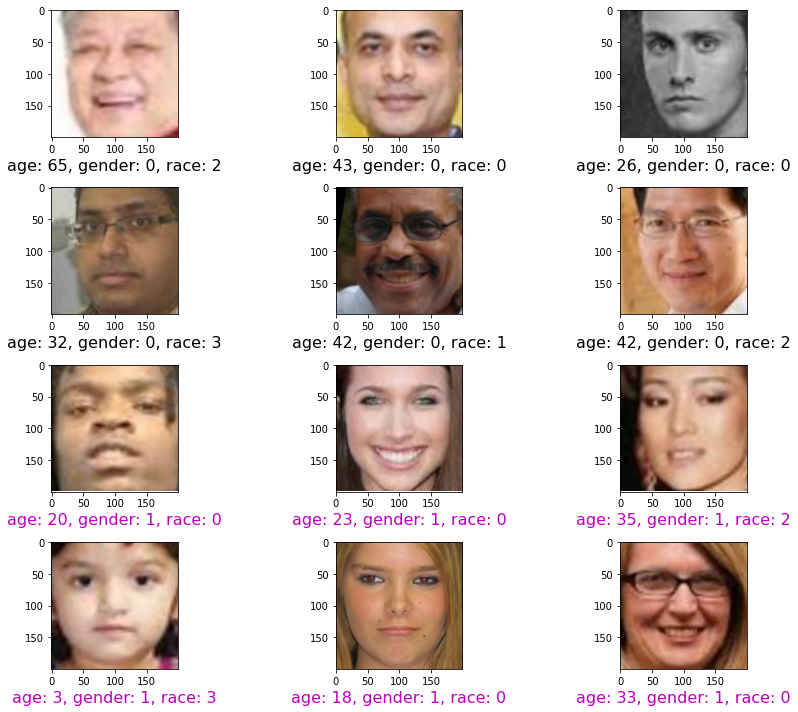

In [ ]:
# plot male, female img -> get random 6 imgs to plot
# from PIL import Image

num = 6
male_rand = np.random.choice(utk_face[m_matches], num)
female_rand = np.random.choice(utk_face[fm_matches], num)
print(f"Male: random {num} imgs, Female: random {num} imgs")

plt.figure(figsize = (12, 10), tight_layout = True)
for i in range(num*2):
    plt.subplot(4, 3, i+1)
    if i < num:   
        # img = Image.open(os.getcwd()+"/UTKFace/"+male_rand[i])
        img = plt.imread(os.getcwd()+"/UTKFace/"+male_rand[i], "jpg")
        plt.xlabel(f"age: {male_rand[i].split('_')[0]}, gender: {male_rand[i].split('_')[1]}, race: {male_rand[i].split('_')[2]}", fontsize = 16)
    else:
        img = plt.imread(os.getcwd()+"/UTKFace/"+female_rand[i-num], "jpg")
        plt.xlabel(f"age: {female_rand[i-num].split('_')[0]}, gender: {female_rand[i-num].split('_')[1]}, race: {female_rand[i-num].split('_')[2]}", fontsize = 16, fontdict = {'color': 'm'})
    plt.imshow(img)

plt.show()

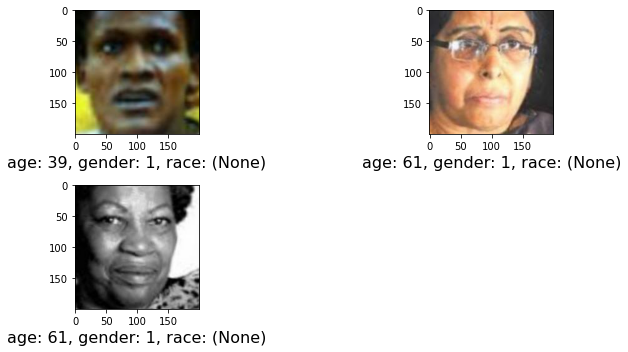

In [ ]:
# plot other img -> race: None (missing data variable)

plt.figure(figsize = (10, 5), tight_layout = True)
for i in range(other.count()):
    plt.subplot(2, 2, i+1)
    # img = Image.open(os.getcwd()+"/UTKFace/"+other.values[i])
    img = plt.imread(os.getcwd()+"/UTKFace/"+other.values[i], "jpg")
    plt.xlabel(f"age: {other.values[i].split('_')[0]}, gender: {other.values[i].split('_')[1]}, race: (None)", fontsize = 16)
    plt.imshow(img)

plt.show()

In [ ]:
# The Intersection of Gender, Race, Age classification 
# gender, age, race: 
male_val = utk_face[m_matches].values
female_val = utk_face[fm_matches].values


# male and female White (age, race) intersection:

def IntersectionOf_White_gender_age(face, gender_val, gender, opt_race):
    intersect_val = []

    if gender == 0:
        flag = "Male"
    elif gender == 1:
        flag = "Female"

    print("Gender:", flag)
    for i in range(len(age_range)):
        age_val = face[age_p_match[i]].values
        race_val = face[r_pattern_match[opt_race]].values

        intersect_g_a = np.intersect1d(gender_val, age_val)

        intersect_g_a_r = pd.Series(np.intersect1d(intersect_g_a, race_val))
        intersect_val.append(intersect_g_a_r.count())
        print(f"Age: ('{age_range[i]}'), Race: {opt_race}({race[opt_race]}) Intersection sum: {intersect_val[i]}")
        # print(f"Top 5:\n{intersect_g_a_r[:5]}")

    print(f"Total: {np.array(intersect_val).cumsum()[-1]}")
    return intersect_val


# White male:
intersect_m_val = IntersectionOf_White_gender_age(utk_face, male_val, 0, 0)
print("\n--------------------------------------------------------------------")

# White female:
intersect_fm_val = IntersectionOf_White_gender_age(utk_face, female_val, 1, 0)


Gender: Male
Age: ('0-9'), Race: 0(White) Intersection sum: 529
Age: ('10-19'), Race: 0(White) Intersection sum: 440
Age: ('20-29'), Race: 0(White) Intersection sum: 934
Age: ('30-39'), Race: 0(White) Intersection sum: 969
Age: ('40-49'), Race: 0(White) Intersection sum: 735
Age: ('50-59'), Race: 0(White) Intersection sum: 943
Age: ('60-69'), Race: 0(White) Intersection sum: 483
Age: ('70-79'), Race: 0(White) Intersection sum: 270
Age: ('80-89'), Race: 0(White) Intersection sum: 136
Age: ('90-99'), Race: 0(White) Intersection sum: 33
Age: ('100-109'), Race: 0(White) Intersection sum: 4
Age: ('110-116'), Race: 0(White) Intersection sum: 1
Total: 5477

--------------------------------------------------------------------
Gender: Female
Age: ('0-9'), Race: 0(White) Intersection sum: 577
Age: ('10-19'), Race: 0(White) Intersection sum: 503
Age: ('20-29'), Race: 0(White) Intersection sum: 1052
Age: ('30-39'), Race: 0(White) Intersection sum: 780
Age: ('40-49'), Race: 0(White) Intersection su

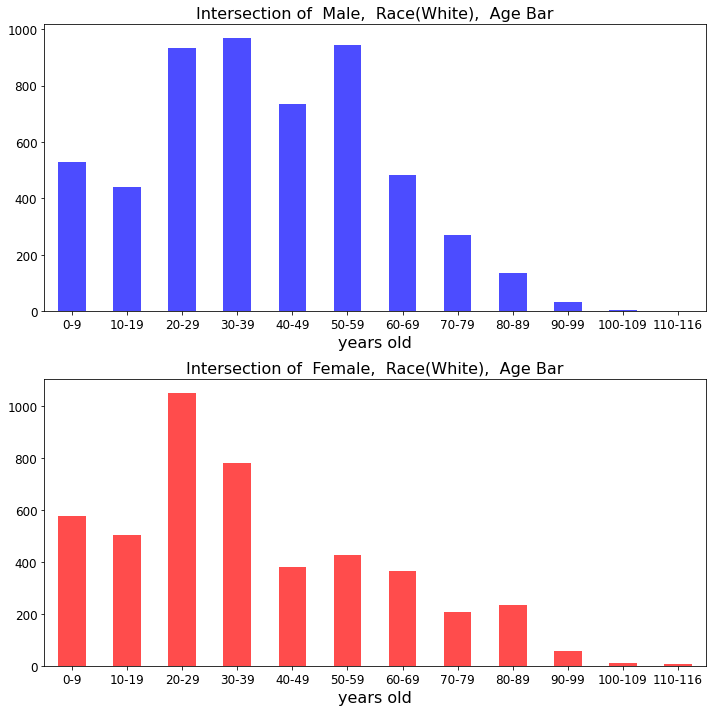

In [ ]:
# Intersection Of White_gender_age bar

intersect_val = (intersect_m_val, intersect_fm_val)
gender = ('Male', 'Female')
c = ('b', 'r')

plt.figure(figsize = (10, 10), tight_layout = True)
for i in range(len(intersect_val)):
    axes = plt.subplot(2, 1, i+1)

    intersect_bar = pd.Series(intersect_val[i], index = age_range)
    plt.title(f"Intersection of  {gender[i]},  Race(White),  Age Bar", fontsize = 16)
    plt.xlabel("years old", fontsize = 16)

    intersect_bar.plot.bar(ax=axes, color=c[i], alpha=0.7, fontsize = 12)
    plt.xticks(rotation=0)

In [ ]:
# Calculate Intersection of Male and Female into Race(White), Age rate


# Race(White) median: 3975, mean: 4741
race_median = np.median(r_matches)
race_mean = np.mean(r_matches)
print(f"Race median: {race_median}, mean: {race_mean}\n")


# White total: 10078
print(f"White total: {np.array(r_matches)[0]}")
white_median_sample = np.random.choice(utk_face[r_pattern_match[0]], int(race_median))
print(white_median_sample.size)  # 3975
print(white_median_sample[:5])


# Male, Race(White): 5477 -> rate ≈ 0.54
# Female, Race(White): 4601 -> rate ≈ 0.46

# median * rate:
# m:
print(np.ceil(3975 * 0.54))  # 2147

# fm:
print(np.floor(3975 * 0.46))  # 1828


# The Raw Gender, Race(White) data div (median * rate) ratio
# m: 5477 / 2147 ≈ 2.55
print(np.sum(np.array(intersect_m_val[:-2]) // 2.55) + np.sum(intersect_m_val[-2:]))  # 2146 -> intersect_m_val last two remain unchanged

# fm: 4601 / 1828 ≈ 2.517
print(np.sum(np.array(intersect_fm_val[:-2]) // 2.517) + np.sum(intersect_fm_val[-2:]))  # 1830 -> intersect_fm_val last two remain un unchanged

# 2146 + 1830 = 3976 ≈ Race median (3975)


Race median: 3975.0, mean: 4741.0

White total: 10078
3975
['40_0_0_20170117185236098.jpg.chip.jpg'
 '32_1_0_20170113001614997.jpg.chip.jpg'
 '52_0_0_20170111171747350.jpg.chip.jpg'
 '26_1_0_20170117154814509.jpg.chip.jpg'
 '26_0_0_20170117172830773.jpg.chip.jpg']
2147.0
1828.0
2146.0
1830.0


In [ ]:
# Gender, Race(White) divide Age Sampling

# The number of Gender, Race(White), Age data div male(2.55 rate) and female(2.517 rate)
# m:
wm_rate = [round(i // 2.55) for i in intersect_m_val[:-2]] + intersect_m_val[-2:]
print(f"\nWhite male divide age sampling: {wm_rate}")

# fm:
wfm_rate = [round(i // 2.517) for i in intersect_fm_val[:-2]] + intersect_fm_val[-2:]
print(f"White female divide age sampling: {wfm_rate}")


def generate_intersectOf_white_gender_age(face, gender_val):
    intersect_total = []

    for i in range(len(age_range)):
        age_val = face[age_p_match[i]].values
        race_val = face[r_pattern_match[0]].values

        intersect_g_a = np.intersect1d(gender_val, age_val)
        intersect_g_a_r = np.intersect1d(intersect_g_a, race_val)
        intersect_total.append(intersect_g_a_r)

        # print(f"Age: ('{age_range[i]}'), Race: {j}({race[j]}) Intersection sum: {intersect_g_a_r.count()}")
        # print(f"Top 5:\n{intersect_g_a_r[:5]}")

    return intersect_total

m_intersect_total = generate_intersectOf_white_gender_age(utk_face, male_val)
fm_intersect_total = generate_intersectOf_white_gender_age(utk_face, female_val)


# use male, female age_rate -> randomly select an intersect_total[i] by age_rate
def age_sampling(intersect, rate):
    sampling = []
    for val, r in zip(intersect, rate):
        sample = np.random.choice(val, r)
        sampling.append(sample)
        
    sample_dict = {k: v for k, v in zip(age_range, sampling)}
   
    return sample_dict   


# male sampling:
m_sample = age_sampling(m_intersect_total, wm_rate)
print(m_sample)

# female_sampling:
fm_sample = age_sampling(fm_intersect_total, wfm_rate)
print(fm_sample)



White male divide age sampling: [207, 172, 366, 380, 288, 369, 189, 105, 53, 12, 4, 1]
White female divide age sampling: [229, 199, 417, 309, 150, 168, 145, 82, 93, 23, 9, 6]
{'0-9': array(['4_0_0_20170110213530901.jpg.chip.jpg',
       '1_0_0_20170109193052283.jpg.chip.jpg',
       '3_0_0_20170110213730328.jpg.chip.jpg',
       '7_0_0_20170110215711115.jpg.chip.jpg',
       '3_0_0_20170109192415151.jpg.chip.jpg',
       '1_0_0_20170109192948605.jpg.chip.jpg',
       '1_0_0_20170110213015629.jpg.chip.jpg',
       '9_0_0_20170110220351738.jpg.chip.jpg',
       '6_0_0_20170110224828816.jpg.chip.jpg',
       '4_0_0_20170105183540567.jpg.chip.jpg',
       '9_0_0_20170110215523228.jpg.chip.jpg',
       '1_0_0_20170110212759695.jpg.chip.jpg',
       '2_0_0_20170110213146269.jpg.chip.jpg',
       '2_0_0_20170109193935916.jpg.chip.jpg',
       '5_0_0_20170110213554657.jpg.chip.jpg',
       '1_0_0_20170110213138878.jpg.chip.jpg',
       '1_0_0_20170110212552670.jpg.chip.jpg',
       '3_0_0_201

In [ ]:
# Merge UTKFace and (Gender, Race(White), Age Sampling data) 

# Race(0): New White imgs (10078 -> 3976)
m_sampling = np.hstack(list(m_sample.values()))
fm_sampling = np.hstack(list(fm_sample.values()))

merge_sample = np.hstack([m_sampling, fm_sampling]) 
print(f"New White Sampling:\n{merge_sample}\nTotal length: {len(merge_sample)}")

new_white_sample = {}
new_white_sample["White"] = merge_sample
print(new_white_sample)


# Race(1~4): Black, Asian, Indian, and Others(like Hispanic, Latino, Middle Eastern):
# pattern = r"^[0-1]?\d?\d+_[0-1]_[0-4]+_"
# race_pattern = [pattern[:20]+str(i)+pattern[-1:] for i in range(5)]
# race_dict = { i:j for i, j in zip(race, race_pattern)}

def generate_4_race(face, r, r_d):
    match_total = []
    face_match = []
    for i, j in enumerate(r, start=1):
        match = face.str.match(r_d[j])
        print(f"UTKFace Race {i}({j}): {match.sum()}")
        print(f"Top 5 data:\n{face[match].head()}\n")
        match_total.append(match.sum())
        face_match.append(np.array(face[match]))

    match_dict = {k:v for k, v in zip(race[1:], face_match)}

    return match_total, match_dict

print("\nUTKface divided into Race(not have White)(include male & female):")
r4_total, r4_dict = generate_4_race(utk_face, race[1:], race_dict)
print(f"UTKface Race(1~4) Total imgs: {np.array(r4_total).cumsum()[-1]}")
print(r4_dict)


# Merge New Race(0) and Race(1~4)
new_white_sample.update(r4_dict)
print(f"\nNew UTKFace dataset dict(sampled):\n{new_white_sample}")

New White Sampling:
['4_0_0_20170110213530901.jpg.chip.jpg'
 '1_0_0_20170109193052283.jpg.chip.jpg'
 '3_0_0_20170110213730328.jpg.chip.jpg' ...
 '110_1_0_20170120134701015.jpg.chip.jpg'
 '110_1_0_20170120134701015.jpg.chip.jpg'
 '115_1_0_20170120134725991.jpg.chip.jpg']
Total length: 3976
{'White': array(['4_0_0_20170110213530901.jpg.chip.jpg',
       '1_0_0_20170109193052283.jpg.chip.jpg',
       '3_0_0_20170110213730328.jpg.chip.jpg', ...,
       '110_1_0_20170120134701015.jpg.chip.jpg',
       '110_1_0_20170120134701015.jpg.chip.jpg',
       '115_1_0_20170120134725991.jpg.chip.jpg'], dtype=object)}

UTKface divided into Race(not have White)(include male & female):
UTKFace Race 1(Black): 4526
Top 5 data:
64     60_0_1_20170119204250215.jpg.chip.jpg
162    70_1_1_20170119205140215.jpg.chip.jpg
180    80_1_1_20170119210040345.jpg.chip.jpg
195    27_0_1_20170116001246691.jpg.chip.jpg
197    26_1_1_20170116022038426.jpg.chip.jpg
dtype: object

UTKFace Race 2(Asian): 3434
Top 5 data:
0   

In [ ]:
# Merge and Shuffle 

# create dict -> race: labels
labels_to_index = dict((name, index) for index, name in enumerate(new_white_sample))
print(labels_to_index)


labels_array = [np.full(v.shape, labels_to_index[k]) for k, v in new_white_sample.items()]
# labels = np.hstack(labels_array).tolist()
labels = np.hstack(labels_array)
print(labels)


# merge new_white_sample
utkface_merge = np.hstack(list(new_white_sample.values()))
print(f"new_utkface length: {len(utkface_merge)}\nTotal imgs array:\n{utkface_merge}")


# shuffle
shuffled_indices = np.random.permutation(len(utkface_merge))
print(shuffled_indices)

new_utkface = {"images": utkface_merge[shuffled_indices], "labels": labels[shuffled_indices]}
print(new_utkface)


{'White': 0, 'Black': 1, 'Asian': 2, 'Indian': 3, 'Others': 4}
[0 0 0 ... 4 4 4]
new_utkface length: 17603
Total imgs array:
['4_0_0_20170110213530901.jpg.chip.jpg'
 '1_0_0_20170109193052283.jpg.chip.jpg'
 '3_0_0_20170110213730328.jpg.chip.jpg' ...
 '24_0_4_20161219192105922.jpg.chip.jpg'
 '27_0_4_20161219194059843.jpg.chip.jpg'
 '1_0_4_20161219195147803.jpg.chip.jpg']
[ 9664 16387 13836 ... 10437  3632 14424]
{'images': array(['29_0_2_20170116161810177.jpg.chip.jpg',
       '35_0_4_20170117203249167.jpg.chip.jpg',
       '30_0_3_20170119162644734.jpg.chip.jpg', ...,
       '56_1_2_20170109010140329.jpg.chip.jpg',
       '66_1_0_20170110123144558.jpg.chip.jpg',
       '49_1_3_20170113190751369.jpg.chip.jpg'], dtype=object), 'labels': array([2, 4, 3, ..., 2, 0, 3])}
